In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import numpy as np

import plotly.express as px



C:\Users\LOQ\anaconda3\Lib\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [2]:
df = pd.read_csv("C:\\Users\\LOQ\\Desktop\\4157834.csv")


AWND - Average wind speed
WSF5 - Fastest 5-second wind speed
WDF5 - Direction of fastest 5-second wind
SNOW - Snowfall
PGTM - Peak gust time
TMAX - Maximum temperature
WESD - Water equivalent of snow on the ground
TAVG - Average Temperature.
TMIN - Minimum temperature
PRCP - Precipitation
SNWD - Snow depth
TSUN - Total sunshine for the period

In [4]:
df.head()

STATION                              NAME        DATE   AWND    PGTM  \
0  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  2000-01-01   7.38  1532.0   
1  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  2000-01-02   7.61  1837.0   
2  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  2000-01-03   3.13   934.0   
3  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  2000-01-04  14.54  1840.0   
4  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  2000-01-05  17.67   858.0   

   PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  TSUN   WDF5  WESD  WSF5  
0  0.00   0.0   0.0  39.0  46.0  31.0   NaN  170.0   0.0  17.0  
1  0.00   0.0   0.0  46.0  54.0  37.0   NaN  180.0   0.0  23.9  
2  0.00   0.0   0.0  53.0  60.0  46.0   NaN  240.0   0.0  13.0  
3  0.62   0.0   0.0  51.0  55.0  47.0   NaN  210.0   0.0  40.0  
4  0.04   0.0   0.0  38.0  47.0  28.0   NaN  300.0   0.0  40.0

In [5]:
df.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND         89
PGTM       5249
PRCP         10
SNOW         10
SNWD         13
TAVG       2862
TMAX         11
TMIN         10
TSUN       9401
WDF5        172
WESD       5412
WSF5        172
dtype: int64

number of missing value / N

In [7]:
df.isnull().sum()/ len(df)

STATION    0.000000
NAME       0.000000
DATE       0.000000
AWND       0.009438
PGTM       0.556628
PRCP       0.001060
SNOW       0.001060
SNWD       0.001379
TAVG       0.303499
TMAX       0.001166
TMIN       0.001060
TSUN       0.996925
WDF5       0.018240
WESD       0.573913
WSF5       0.018240
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9430 entries, 0 to 9429
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  9430 non-null   object 
 1   NAME     9430 non-null   object 
 2   DATE     9430 non-null   object 
 3   AWND     9341 non-null   float64
 4   PGTM     4181 non-null   float64
 5   PRCP     9420 non-null   float64
 6   SNOW     9420 non-null   float64
 7   SNWD     9417 non-null   float64
 8   TAVG     6568 non-null   float64
 9   TMAX     9419 non-null   float64
 10  TMIN     9420 non-null   float64
 11  TSUN     29 non-null     float64
 12  WDF5     9258 non-null   float64
 13  WESD     4018 non-null   float64
 14  WSF5     9258 non-null   float64
dtypes: float64(12), object(3)
memory usage: 1.1+ MB


PRCP in inches

In [17]:
df["DATE"].dtype

dtype('O')

تحويل DATE
من string
الى Time

In [22]:
df['DATE'] = pd.to_datetime(df['DATE'])


In [24]:
df['DATE'].dtype

dtype('<M8[ns]')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9430 entries, 0 to 9429
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  9430 non-null   object        
 1   NAME     9430 non-null   object        
 2   DATE     9430 non-null   datetime64[ns]
 3   AWND     9341 non-null   float64       
 4   PGTM     4181 non-null   float64       
 5   PRCP     9420 non-null   float64       
 6   SNOW     9420 non-null   float64       
 7   SNWD     9417 non-null   float64       
 8   TAVG     6568 non-null   float64       
 9   TMAX     9419 non-null   float64       
 10  TMIN     9420 non-null   float64       
 11  TSUN     29 non-null     float64       
 12  WDF5     9258 non-null   float64       
 13  WESD     4018 non-null   float64       
 14  WSF5     9258 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 1.1+ MB


In [28]:
df[['DATE', 'PRCP']]


DATE  PRCP
0    2000-01-01  0.00
1    2000-01-02  0.00
2    2000-01-03  0.00
3    2000-01-04  0.62
4    2000-01-05  0.04
...         ...   ...
9425 2025-10-21  0.03
9426 2025-10-22  0.14
9427 2025-10-23  0.00
9428 2025-10-24  0.00
9429 2025-10-25  0.00

[9430 rows x 2 columns]

In [30]:
df['DATE'].dt.month.value_counts()


DATE
1     806
3     806
5     806
7     806
8     806
10    800
4     780
6     780
9     780
12    775
11    750
2     735
Name: count, dtype: int64

In [32]:
df.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND         89
PGTM       5249
PRCP         10
SNOW         10
SNWD         13
TAVG       2862
TMAX         11
TMIN         10
TSUN       9401
WDF5        172
WESD       5412
WSF5        172
dtype: int64

In [34]:
years = df['DATE'].dt.year.unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025])

In [36]:
DATE_Year = df.groupby(df['DATE'].dt.year)['PRCP'].sum().to_dict()


In [38]:
DATE_Year

{2000: 41.02,
 2001: 32.72,
 2002: 43.13,
 2003: 44.77,
 2004: 50.95,
 2005: 49.55,
 2006: 44.8,
 2007: 46.910000000000004,
 2008: 46.26,
 2009: 45.88,
 2010: 42.47,
 2011: 55.78,
 2012: 39.85,
 2013: 35.48,
 2014: 50.75,
 2015: 38.31,
 2016: 36.01,
 2017: 43.11,
 2018: 57.4,
 2019: 51.99,
 2020: 40.89,
 2021: 43.46,
 2022: 35.77,
 2023: 52.58,
 2024: 38.71,
 2025: 27.12}

In [40]:
years = list(DATE_Year.keys())
precipitation = list(DATE_Year.values())

plt.figure(figsize=(10,5))
plt.scatter(years, precipitation, color='skyblue', edgecolor='navy')
plt.title('Total Precipitation by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Precipitation (insh)', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.savefig("precipitation_by_year.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [43]:
WindSpeed_AVG_BY_Year = df.groupby(df['DATE'].dt.year)["WSF5"].mean()

In [45]:
WindSpeed_AVG_BY_Year

DATE
2000    26.686339
2001    25.750137
2002    27.139726
2003    26.568493
2004    26.260383
2005    26.227671
2006    27.420879
2007    26.331389
2008    26.783333
2009    26.925691
2010    29.012155
2011    27.906799
2012    27.682153
2013    27.724090
2014    27.667409
2015    27.629630
2016    28.184254
2017    27.557459
2018    27.978453
2019    28.205525
2020    28.678947
2021    27.467671
2022    27.980274
2023    26.660548
2024    28.470920
2025    30.631513
Name: WSF5, dtype: float64

In [47]:
fig = WindSpeed_AVG_BY_Year.iplot(kind='scatter', asFigure=True)
fig.write_html("windspeed_plot.html")

In [48]:

plt.figure(figsize=(10, 6))
plt.plot(WindSpeed_AVG_BY_Year.index, WindSpeed_AVG_BY_Year.values, 'o-')
plt.xlabel('Year')
plt.ylabel('Wind Speed Average')
plt.title('Wind Speed Average by Year')
plt.grid(True)
plt.savefig("windspeed_plot.pdf", format='pdf', bbox_inches='tight')
plt.close()

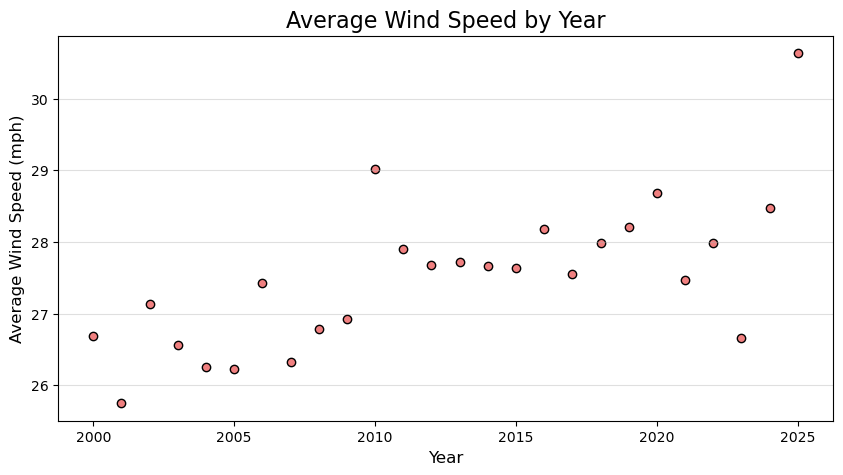

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(years, WindSpeed_AVG_BY_Year, color='lightcoral', edgecolor='black')

plt.title('Average Wind Speed by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wind Speed (mph)', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.savefig("WindSpeed_AVG_BY_Year.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [52]:
df.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF5', 'WESD', 'WSF5'],
      dtype='object')

In [55]:
df

STATION                              NAME       DATE   AWND    PGTM  \
0     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-01   7.38  1532.0   
1     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-02   7.61  1837.0   
2     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-03   3.13   934.0   
3     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-04  14.54  1840.0   
4     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-05  17.67   858.0   
...           ...                               ...        ...    ...     ...   
9425  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-21    NaN     NaN   
9426  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-22    NaN     NaN   
9427  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-23    NaN     NaN   
9428  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-24    NaN     NaN   
9429  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-25    NaN     NaN   

      PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  TSUN   WDF5  WESD  WSF5  
0     0.00   0.0   0.0  39.0  46.0  31.0   NaN  170.0   0.0  17.0  
1     0.00   0.0   0.0  46.0  54.0  37.0   NaN  180.0   0.0  23.9  
2     0.00   0.0   0.0  53.0  60.0  46.0   NaN  240.0   0.0  13.0  
3     0.62   0.0   0.0  51.0  55.0  47.0   NaN  210.0   0.0  40.0  
4     0.04   0.0   0.0  38.0  47.0  28.0   NaN  300.0   0.0  40.0  
...    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  
9425  0.03   0.0   0.0   NaN  66.0  51.0   NaN    NaN   NaN   NaN  
9426  0.14   0.0   0.0   NaN  65.0  55.0   NaN    NaN   NaN   NaN  
9427  0.00   0.0   0.0   NaN  63.0  51.0   NaN    NaN   NaN   NaN  
9428  0.00   0.0   0.0   NaN  61.0  47.0   NaN    NaN   NaN   NaN  
9429  0.00   0.0   0.0   NaN  60.0  45.0   NaN    NaN   NaN   NaN  

[9430 rows x 15 columns]

In [57]:
Snow_Depth = df.groupby(df['DATE'].dt.day)["SNWD"]

In [61]:

df_clean = df[['SNWD', 'TMIN']].dropna()

fig, ax = plt.subplots(figsize=(12, 7))
hexbin = ax.hexbin(df_clean['SNWD'], df_clean['TMIN'], 
                   gridsize=25, cmap='YlOrRd', mincnt=1)

ax.set_xlabel('Snow Depth (mm)', fontsize=13, fontweight='bold')
ax.set_ylabel('Minimum Temperature (°F)', fontsize=13, fontweight='bold')
ax.set_title('Density: Snow Depth vs Minimum Temperature', 
             fontsize=15, fontweight='bold', pad=20)

cbar = plt.colorbar(hexbin, ax=ax)
cbar.set_label('Number of observations', fontsize=11)

correlation = df_clean['SNWD'].corr(df_clean['TMIN'])
ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
        transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('snwd_tmin_hexbin.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
df.head()

STATION                              NAME       DATE   AWND    PGTM  \
0  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-01   7.38  1532.0   
1  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-02   7.61  1837.0   
2  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-03   3.13   934.0   
3  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-04  14.54  1840.0   
4  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-05  17.67   858.0   

   PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  TSUN   WDF5  WESD  WSF5  
0  0.00   0.0   0.0  39.0  46.0  31.0   NaN  170.0   0.0  17.0  
1  0.00   0.0   0.0  46.0  54.0  37.0   NaN  180.0   0.0  23.9  
2  0.00   0.0   0.0  53.0  60.0  46.0   NaN  240.0   0.0  13.0  
3  0.62   0.0   0.0  51.0  55.0  47.0   NaN  210.0   0.0  40.0  
4  0.04   0.0   0.0  38.0  47.0  28.0   NaN  300.0   0.0  40.0

In [65]:
df["WESD"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: WESD, dtype: float64

In [67]:
df_WESD = df[["WESD", "TMIN"]].dropna()

# رسم العلاقة
plt.figure(figsize=(8,6))
plt.scatter(df_WESD["TMIN"], df_WESD["WESD"], alpha=0.6)
plt.title("Relationship between water equivalent of snow (WESD) and Average Temperature (TAVG)")
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Snow Depth (mm)")
plt.grid(True)
plt.show()


In [69]:
import seaborn as sns

# تنظيف البيانات
df_WESD = df[["WESD", "TAVG"]].dropna()

# إنشاء الشكل
plt.figure(figsize=(9,7))
sns.kdeplot(
    data=df_WESD,
    x="TAVG",
    y="WESD",
    fill=False,
    cmap="viridis",
    thresh=0.05,
    levels=30,
    linewidths=0.8
)

# تحسينات الشكل
plt.title("Bivariate Density of Snow Water Equivalent (WESD) and Average Temperature (TAVG)", fontsize=13, weight='bold')
plt.xlabel("Average Temperature (°F)", fontsize=11)
plt.ylabel("Water Equivalent of Snow (mm)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("WESD_TAVG_Density.pdf", dpi=300, bbox_inches='tight')

plt.show()


In [70]:
df.head()

STATION                              NAME       DATE   AWND    PGTM  \
0  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-01   7.38  1532.0   
1  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-02   7.61  1837.0   
2  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-03   3.13   934.0   
3  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-04  14.54  1840.0   
4  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-05  17.67   858.0   

   PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  TSUN   WDF5  WESD  WSF5  
0  0.00   0.0   0.0  39.0  46.0  31.0   NaN  170.0   0.0  17.0  
1  0.00   0.0   0.0  46.0  54.0  37.0   NaN  180.0   0.0  23.9  
2  0.00   0.0   0.0  53.0  60.0  46.0   NaN  240.0   0.0  13.0  
3  0.62   0.0   0.0  51.0  55.0  47.0   NaN  210.0   0.0  40.0  
4  0.04   0.0   0.0  38.0  47.0  28.0   NaN  300.0   0.0  40.0

In [73]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.pdf", dpi=300, bbox_inches='tight')

plt.show()

In [74]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Columns")
plt.savefig("Distribution_of_Numerical_Columns.pdf", dpi=300, bbox_inches='tight')

plt.show()

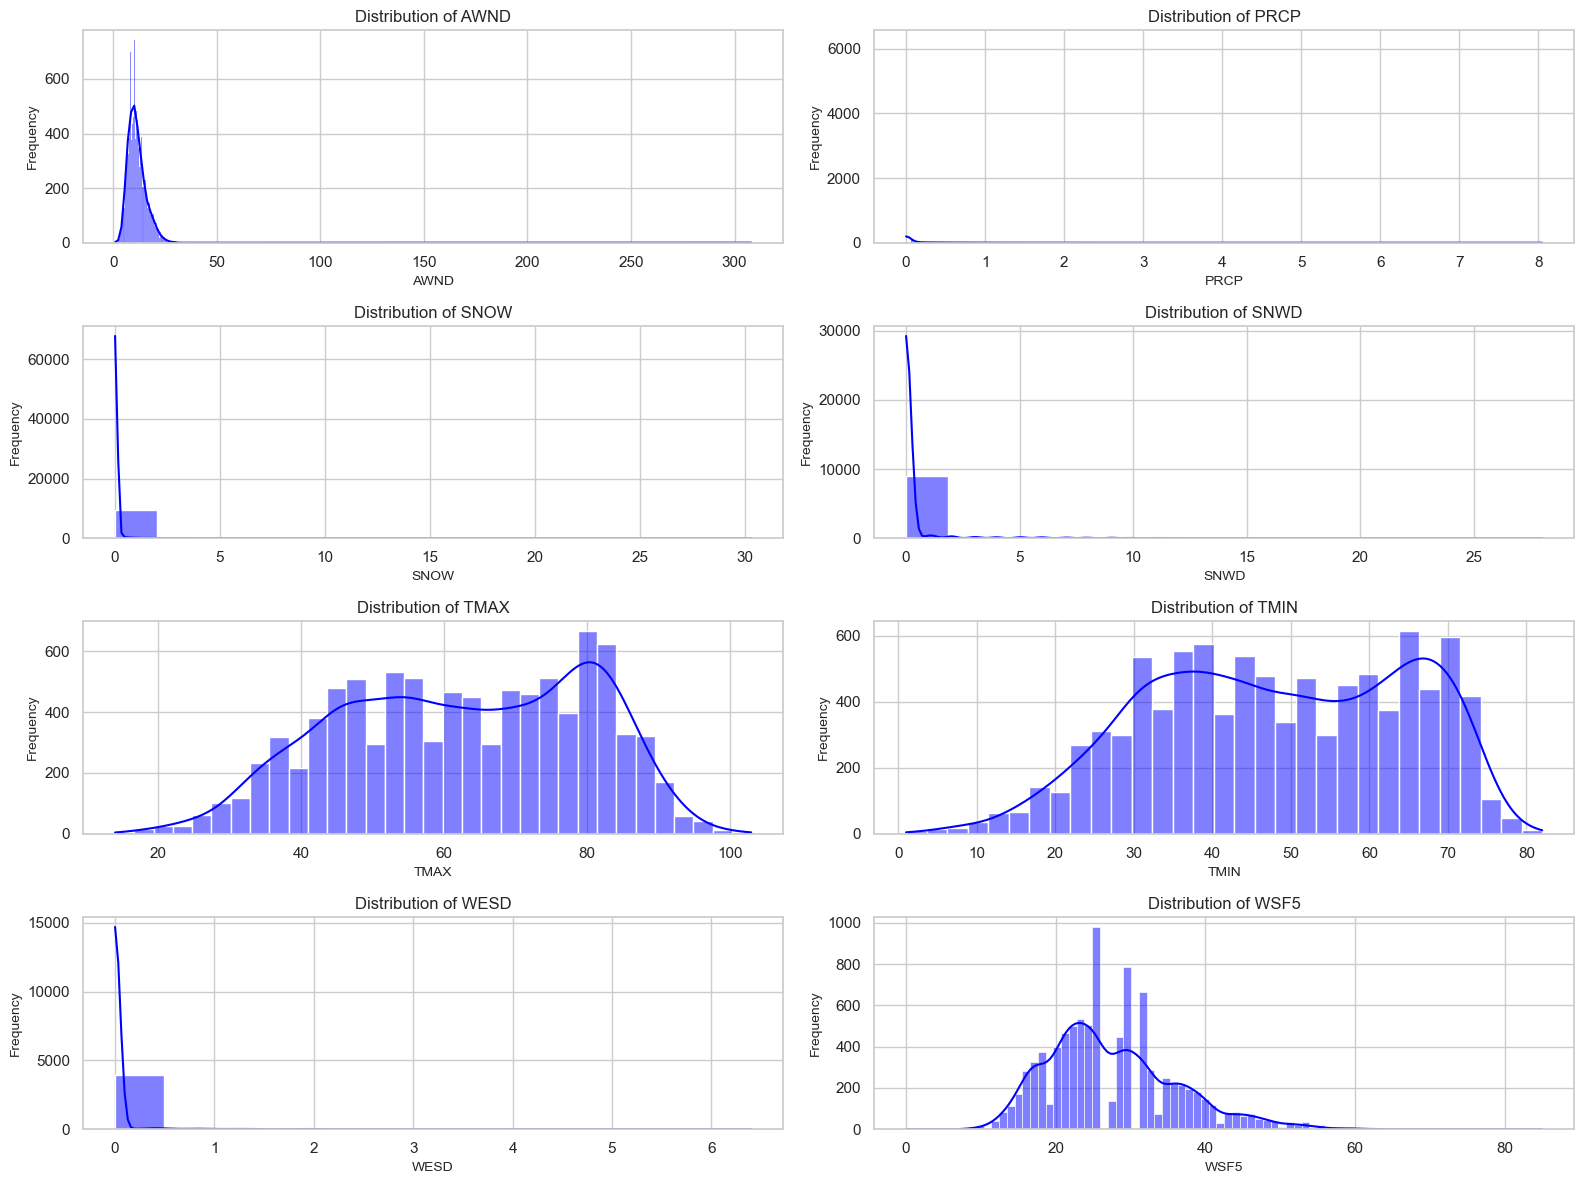

In [75]:
features = ["AWND", "PRCP", "SNOW", "SNWD", "TMAX", "TMIN", "WESD", "WSF5"] # Corrected 'FWSF5' to 'WSF5'
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=df, x=feature, kde=True, color='blue')
    plt.title(f"Distribution of {feature}", fontsize=12)
    plt.xlabel(f"{feature}", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
plt.savefig("relationshipsWithFrequency.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

In [76]:
df_WESD = df[["WESD", "TMIN"]].dropna()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_WESD, x="TMIN", y="WESD", alpha=0.6)

# إضافة Polynomial Regression Line
plt.plot(myline, mymodel(myline), color='red', linewidth=2)

plt.title("Relationship between water equivalent of snow (WESD) and Average Temperature (TAVG)")
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Snow Depth (mm)")
plt.grid(True)
plt.savefig("WESD&TAVG.pdf", format='pdf', bbox_inches='tight')
plt.show()

NameError: name 'myline' is not defined

In [ ]:
df.describe()



In [ ]:
df[df.columns].iplot(kind ="box")

In [ ]:
df.isnull().sum()

In [ ]:
df["WESD"].value_counts()

In [ ]:
theta = np.deg2rad(df['WESD'])

df['U_Component'] = np.sin(theta)
df['V_Component'] = np.cos(theta)


In [83]:
df

STATION                              NAME       DATE   AWND    PGTM  \
0     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-01   7.38  1532.0   
1     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-02   7.61  1837.0   
2     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-03   3.13   934.0   
3     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-04  14.54  1840.0   
4     USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2000-01-05  17.67   858.0   
...           ...                               ...        ...    ...     ...   
9425  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-21    NaN     NaN   
9426  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-22    NaN     NaN   
9427  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-23    NaN     NaN   
9428  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-24    NaN     NaN   
9429  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 2025-10-25    NaN     NaN   

      PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  TSUN   WDF5  WESD  WSF5  
0     0.00   0.0   0.0  39.0  46.0  31.0   NaN  170.0   0.0  17.0  
1     0.00   0.0   0.0  46.0  54.0  37.0   NaN  180.0   0.0  23.9  
2     0.00   0.0   0.0  53.0  60.0  46.0   NaN  240.0   0.0  13.0  
3     0.62   0.0   0.0  51.0  55.0  47.0   NaN  210.0   0.0  40.0  
4     0.04   0.0   0.0  38.0  47.0  28.0   NaN  300.0   0.0  40.0  
...    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  
9425  0.03   0.0   0.0   NaN  66.0  51.0   NaN    NaN   NaN   NaN  
9426  0.14   0.0   0.0   NaN  65.0  55.0   NaN    NaN   NaN   NaN  
9427  0.00   0.0   0.0   NaN  63.0  51.0   NaN    NaN   NaN   NaN  
9428  0.00   0.0   0.0   NaN  61.0  47.0   NaN    NaN   NaN   NaN  
9429  0.00   0.0   0.0   NaN  60.0  45.0   NaN    NaN   NaN   NaN  

[9430 rows x 15 columns]

In [85]:
num_cols = df.select_dtypes(include='number').columns


In [87]:
df = df.reset_index()  
df['DOY'] = df['DATE'].dt.dayofyear

In [89]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()


In [113]:
seasonal_means = df.groupby('DOY')[num_cols].mean()

for col in num_cols:
    df[col] = df[col].fillna(df['DOY'].map(seasonal_means[col]))

df.drop(columns='DOY', inplace=True)

In [115]:
df.isnull().sum()

index             0
STATION           0
NAME              0
DATE              0
AWND              0
PGTM              0
PRCP              0
SNOW              0
SNWD              0
TAVG              0
TMAX              0
TMIN              0
TSUN           8730
WDF5              0
WESD              0
WSF5              0
U_Component       0
V_Component       0
dtype: int64

In [117]:
df.drop(columns=[
    'NAME', 'DATE', 'level_0', 'index',
    'STATION', 'WESD', 'TSUN'
], inplace=True, errors='ignore')


In [122]:
df

AWND    PGTM  PRCP  SNOW  SNWD       TAVG  TMAX  TMIN   WDF5    WSF5  \
0      7.3800  1532.0  0.00   0.0   0.0  39.000000  46.0  31.0  170.0  17.000   
1      7.6100  1837.0  0.00   0.0   0.0  46.000000  54.0  37.0  180.0  23.900   
2      3.1300   934.0  0.00   0.0   0.0  53.000000  60.0  46.0  240.0  13.000   
3     14.5400  1840.0  0.62   0.0   0.0  51.000000  55.0  47.0  210.0  40.000   
4     17.6700   858.0  0.04   0.0   0.0  38.000000  47.0  28.0  300.0  40.000   
...       ...     ...   ...   ...   ...        ...   ...   ...    ...     ...   
9425   9.9152  1518.6  0.03   0.0   0.0  58.705882  66.0  51.0  217.6  24.276   
9426  10.4240  1975.7  0.14   0.0   0.0  57.529412  65.0  55.0  224.0  24.308   
9427  12.4912  1420.3  0.00   0.0   0.0  56.470588  63.0  51.0  223.2  27.820   
9428  10.6656  1470.7  0.00   0.0   0.0  54.764706  61.0  47.0  200.4  25.100   
9429  11.4092  1316.8  0.00   0.0   0.0  57.529412  60.0  45.0  216.4  26.996   

      U_Component  V_Component  
0             0.0          1.0  
1             0.0          1.0  
2             0.0          1.0  
3             0.0          1.0  
4             0.0          1.0  
...           ...          ...  
9425          0.0          1.0  
9426          0.0          1.0  
9427          0.0          1.0  
9428          0.0          1.0  
9429          0.0          1.0  

[9430 rows x 12 columns]

In [124]:
Y = df["TAVG"]
X = df.drop(["TAVG"],axis = 1)

In [126]:
Y

0       39.000000
1       46.000000
2       53.000000
3       51.000000
4       38.000000
          ...    
9425    58.705882
9426    57.529412
9427    56.470588
9428    54.764706
9429    57.529412
Name: TAVG, Length: 9430, dtype: float64

In [128]:
X

AWND    PGTM  PRCP  SNOW  SNWD  TMAX  TMIN   WDF5    WSF5  \
0      7.3800  1532.0  0.00   0.0   0.0  46.0  31.0  170.0  17.000   
1      7.6100  1837.0  0.00   0.0   0.0  54.0  37.0  180.0  23.900   
2      3.1300   934.0  0.00   0.0   0.0  60.0  46.0  240.0  13.000   
3     14.5400  1840.0  0.62   0.0   0.0  55.0  47.0  210.0  40.000   
4     17.6700   858.0  0.04   0.0   0.0  47.0  28.0  300.0  40.000   
...       ...     ...   ...   ...   ...   ...   ...    ...     ...   
9425   9.9152  1518.6  0.03   0.0   0.0  66.0  51.0  217.6  24.276   
9426  10.4240  1975.7  0.14   0.0   0.0  65.0  55.0  224.0  24.308   
9427  12.4912  1420.3  0.00   0.0   0.0  63.0  51.0  223.2  27.820   
9428  10.6656  1470.7  0.00   0.0   0.0  61.0  47.0  200.4  25.100   
9429  11.4092  1316.8  0.00   0.0   0.0  60.0  45.0  216.4  26.996   

      U_Component  V_Component  
0             0.0          1.0  
1             0.0          1.0  
2             0.0          1.0  
3             0.0          1.0  
4             0.0          1.0  
...           ...          ...  
9425          0.0          1.0  
9426          0.0          1.0  
9427          0.0          1.0  
9428          0.0          1.0  
9429          0.0          1.0  

[9430 rows x 11 columns]

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [132]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size=0.2)

In [134]:
xgbr = XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    enable_categorical=True,
    random_state=42
)


In [136]:
xgbr.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [137]:
y_pred_xgb = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
rmse
print(f"MSE:{ mse} , rmse :{rmse}")


MSE:12.443425394813964 , rmse :3.527523975087053


In [141]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [143]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [145]:
svr = SVR(
    kernel='rbf',
    C=10,
    epsilon=0.1,
    gamma='scale'
)

svr.fit(X_train_scaled, y_train)


SVR(C=10)

In [146]:
y_pred_svr = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("MSE:", mse)
print("R2:", r2)


MSE: 14.446793585901737
R2: 0.9452876217177139


In [148]:
from sklearn.ensemble import RandomForestRegressor


In [149]:
rf = RandomForestRegressor(
    n_estimators=200,  
    max_depth=3,     
    random_state=42
)

rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=3, n_estimators=200, random_state=42)

In [150]:
y_pred_rf = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("MSE:", mse)
print("R2:", r2)


MSE: 18.54682713796774
R2: 0.9297601217685478


In [173]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Random Forest": y_pred_rf,
    "SVR": y_pred_svr,
    "XGBoost": y_pred_xgb
}

results = []

for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, rmse, mae, r2])

df_results = pd.DataFrame(
    results, 
    columns=["Model", "MSE", "RMSE", "MAE", "R2"]
)

df_results


Model        MSE      RMSE       MAE        R2
0  Random Forest  18.546827  4.306603  3.099306  0.929760
1            SVR  14.446794  3.800894  2.352911  0.945288
2        XGBoost  12.443425  3.527524  2.326017  0.952875

In [202]:
plt.figure(figsize=(7,7))

plt.scatter(y_test, y_pred_rf, alpha=0.4, label='Random Forest')
plt.scatter(y_test, y_pred_svr, alpha=0.4, label='SVR')
plt.scatter(y_test, y_pred_xgb, alpha=0.4, label='XGBoost')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Comparison')
plt.legend()
plt.savefig("Actual vs Predicted Comparison.pdf")
plt.show()


In [198]:
plt.figure(figsize=(7,5))

plt.scatter(y_pred_rf, y_test - y_pred_rf, alpha=0.4, label='Random Forest')
plt.scatter(y_pred_svr, y_test - y_pred_svr, alpha=0.4, label='SVR')
plt.scatter(y_pred_xgb, y_test - y_pred_xgb, alpha=0.4, label='XGBoost')

plt.axhline(0, linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.legend()
plt.savefig("residuals_vs_predicted.pdf")
plt.show()


In [194]:
errors_rf = y_test - y_pred_rf
errors_svr = y_test - y_pred_svr
errors_xgb = y_test - y_pred_xgb

plt.figure(figsize=(7,5))
plt.boxplot([errors_rf, errors_svr, errors_xgb],
            labels=['Random Forest', 'SVR', 'XGBoost'])

plt.ylabel('Error')
plt.title('Error Distribution')
plt.savefig("error_distribution.pdf")
plt.show()



C:\Users\LOQ\AppData\Local\Temp\ipykernel_26820\1998722686.py:6: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



In [196]:
plt.figure(figsize=(7,5))

for name, y_pred in zip(
    ['Random Forest', 'SVR', 'XGBoost'],
    [y_pred_rf, y_pred_svr, y_pred_xgb]
):
    abs_err = abs(y_test - y_pred)
    sorted_err = sorted(abs_err)
    plt.plot(sorted_err, label=name)

plt.xlabel('Model')
plt.ylabel('Absolute Error')
plt.title('Cumulative Absolute Error')
plt.legend()
plt.savefig("Cumulative Absolute Error.pdf")
plt.show()
